In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [7]:
Students_performance = pd.read_excel('C:\\Users\\HP PC\\Desktop\\BSDS 2_2\\BIG DATA ANALYTICS\\Student_performance1.xlsx')
Students_performance

,Access_no,gender,age,course,DSC3108,DSC3114,MTH3108,SYE3104
0,Q104895,Female,21.0,Engineering,1000.0,88.0,NaN,94.0
1,J499692,Male,35.0,Engineering,71.0,77.0,90.0,76.0
2,F664488,Female,22.0,Engineering,90.0,83.0,80.0,NaN
3,L070268,Male,32.0,Engineering,83.0,80.0,77.0,97.0
4,F695622,Male,27.0,Computer Science,79.0,83.0,64.0,58.0
...,...,...,...,...,...,...,...,...
295,N524494,Male,35.0,Engineering,94.0,53.0,96.0,59.0
296,Y193431,Male,NaN,Mathematics,NaN,52.0,63.0,100.0
297,R876132,Female,40.0,Computer Science,66.0,95.0,78.0,94.0
298,A471182,Male,36.0,Business,67.0,71.0,86.0,66.0


In [ ]:
##Dealing with outliers
##Checking for outliers using a boxplot especailly for continuous values
cont_df = Students_performance.select_dtypes(include=['int64','float64'])
cont_df

,age,DSC3108,DSC3114,MTH3108,SYE3104
0,21.0,1000.0,88.0,NaN,94.0
1,35.0,71.0,77.0,90.0,76.0
2,22.0,90.0,83.0,80.0,NaN
3,32.0,83.0,80.0,77.0,97.0
4,27.0,79.0,83.0,64.0,58.0
...,...,...,...,...,...
295,35.0,94.0,53.0,96.0,59.0
296,NaN,NaN,52.0,63.0,100.0
297,40.0,66.0,95.0,78.0,94.0
298,36.0,67.0,71.0,86.0,66.0


Text(0.5, 1.0, 'Outliers in Age')

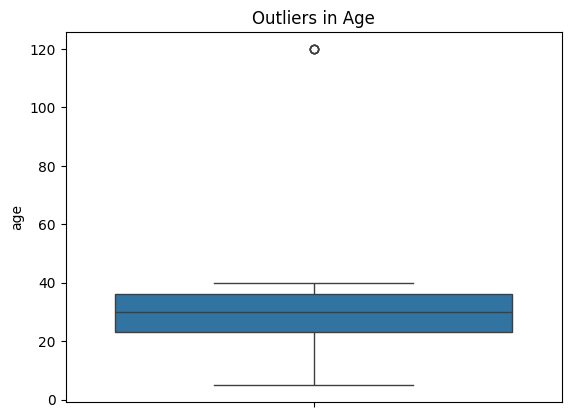

In [15]:
##checking for outliers
sns.boxplot(y='age', data=Students_performance)
plt.title('Outliers in Age')

In [18]:
##Dropping the outliers using IQR
Students_performance['age'].describe()

count    269.000000
mean      30.773234
std       13.071726
min        5.000000
25%       23.000000
50%       30.000000
75%       36.000000
max      120.000000
Name: age, dtype: float64

In [27]:
Students_performance.isna().sum()


Access_no     0
gender       28
age          31
course        0
DSC3108       8
DSC3114      17
MTH3108      17
SYE3104      14
dtype: int64

<Axes: ylabel='age'>

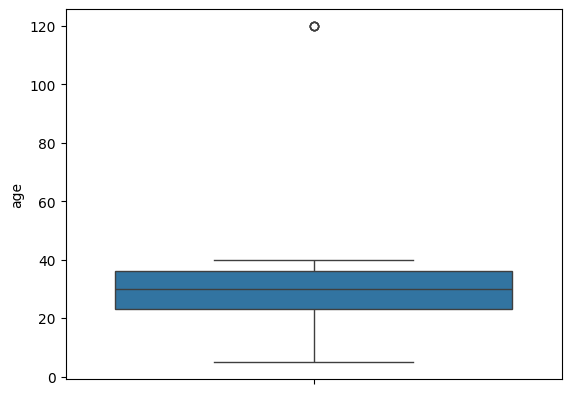

In [30]:
##Dealing with age
sns.boxplot(y='age',  data=Students_performance)

In [32]:
Students_performance['age'] = Students_performance['age'].fillna(Students_performance['age'].median())
Students_performance['age'].isna().sum()

np.int64(0)

In [38]:
def remove_outliers(data):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        #Finding IQR
        iqr = q3 - q1
        #Finding lower and upper bounds
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        #Removing outliers
        data[col] = np.where(data[col] >= lower_bound) | (data[col] <= upper_bound)

In [39]:
Students_performance.isna().sum()

Access_no     0
gender       28
age           0
course        0
DSC3108       8
DSC3114      17
MTH3108      17
SYE3104      14
dtype: int64

In [40]:
Students_performance['gender'] = Students_performance['gender'].fillna(Students_performance['gender'].mode()[0])

In [41]:
Students_performance['gender'].isna().sum()

np.int64(0)

In [42]:
Students_performance['DSC3114'] = Students_performance['DSC3114'].interpolate(method='linear')

In [43]:
Students_performance['DSC3114'].isna().sum()

np.int64(0)

In [44]:
Students_performance['DSC3108'] = Students_performance['DSC3108'].bfill()

In [45]:
Students_performance['DSC3108'].isna().sum()

np.int64(0)

In [46]:
Students_performance.columns

Index(['Access_no', 'gender', 'age', 'course', 'DSC3108', 'DSC3114', 'MTH3108',
       'SYE3104'],
      dtype='object')

In [47]:
Students_performance.isna().sum()


Access_no     0
gender        0
age           0
course        0
DSC3108       0
DSC3114       0
MTH3108      17
SYE3104      14
dtype: int64

In [50]:
Students_performance['MTH3108'] = Students_performance['MTH3108'].bfill()

In [51]:
Students_performance['MTH3108'].isna().sum()

np.int64(0)

<Axes: xlabel='SYE3104', ylabel='Count'>

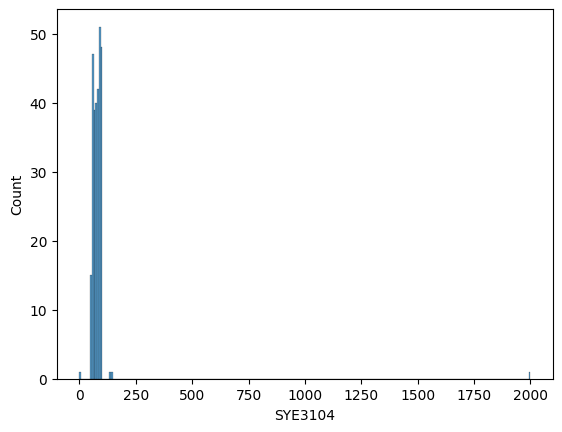

In [55]:
sns.histplot(data = Students_performance['SYE3104'])

In [56]:
Students_performance['SYE3104'] = Students_performance['SYE3104'].fillna(Students_performance['SYE3104'].median())

In [58]:
Students_performance.isna().sum()

Access_no    0
gender       0
age          0
course       0
DSC3108      0
DSC3114      0
MTH3108      0
SYE3104      0
dtype: int64

In [61]:
def check_outliers(data):
    plt.figure(figsize=(20,20))
    for i,col in enumerate(data.columns):
        plt.subplot(3,3, i+1)
        sns.boxplot(data[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()


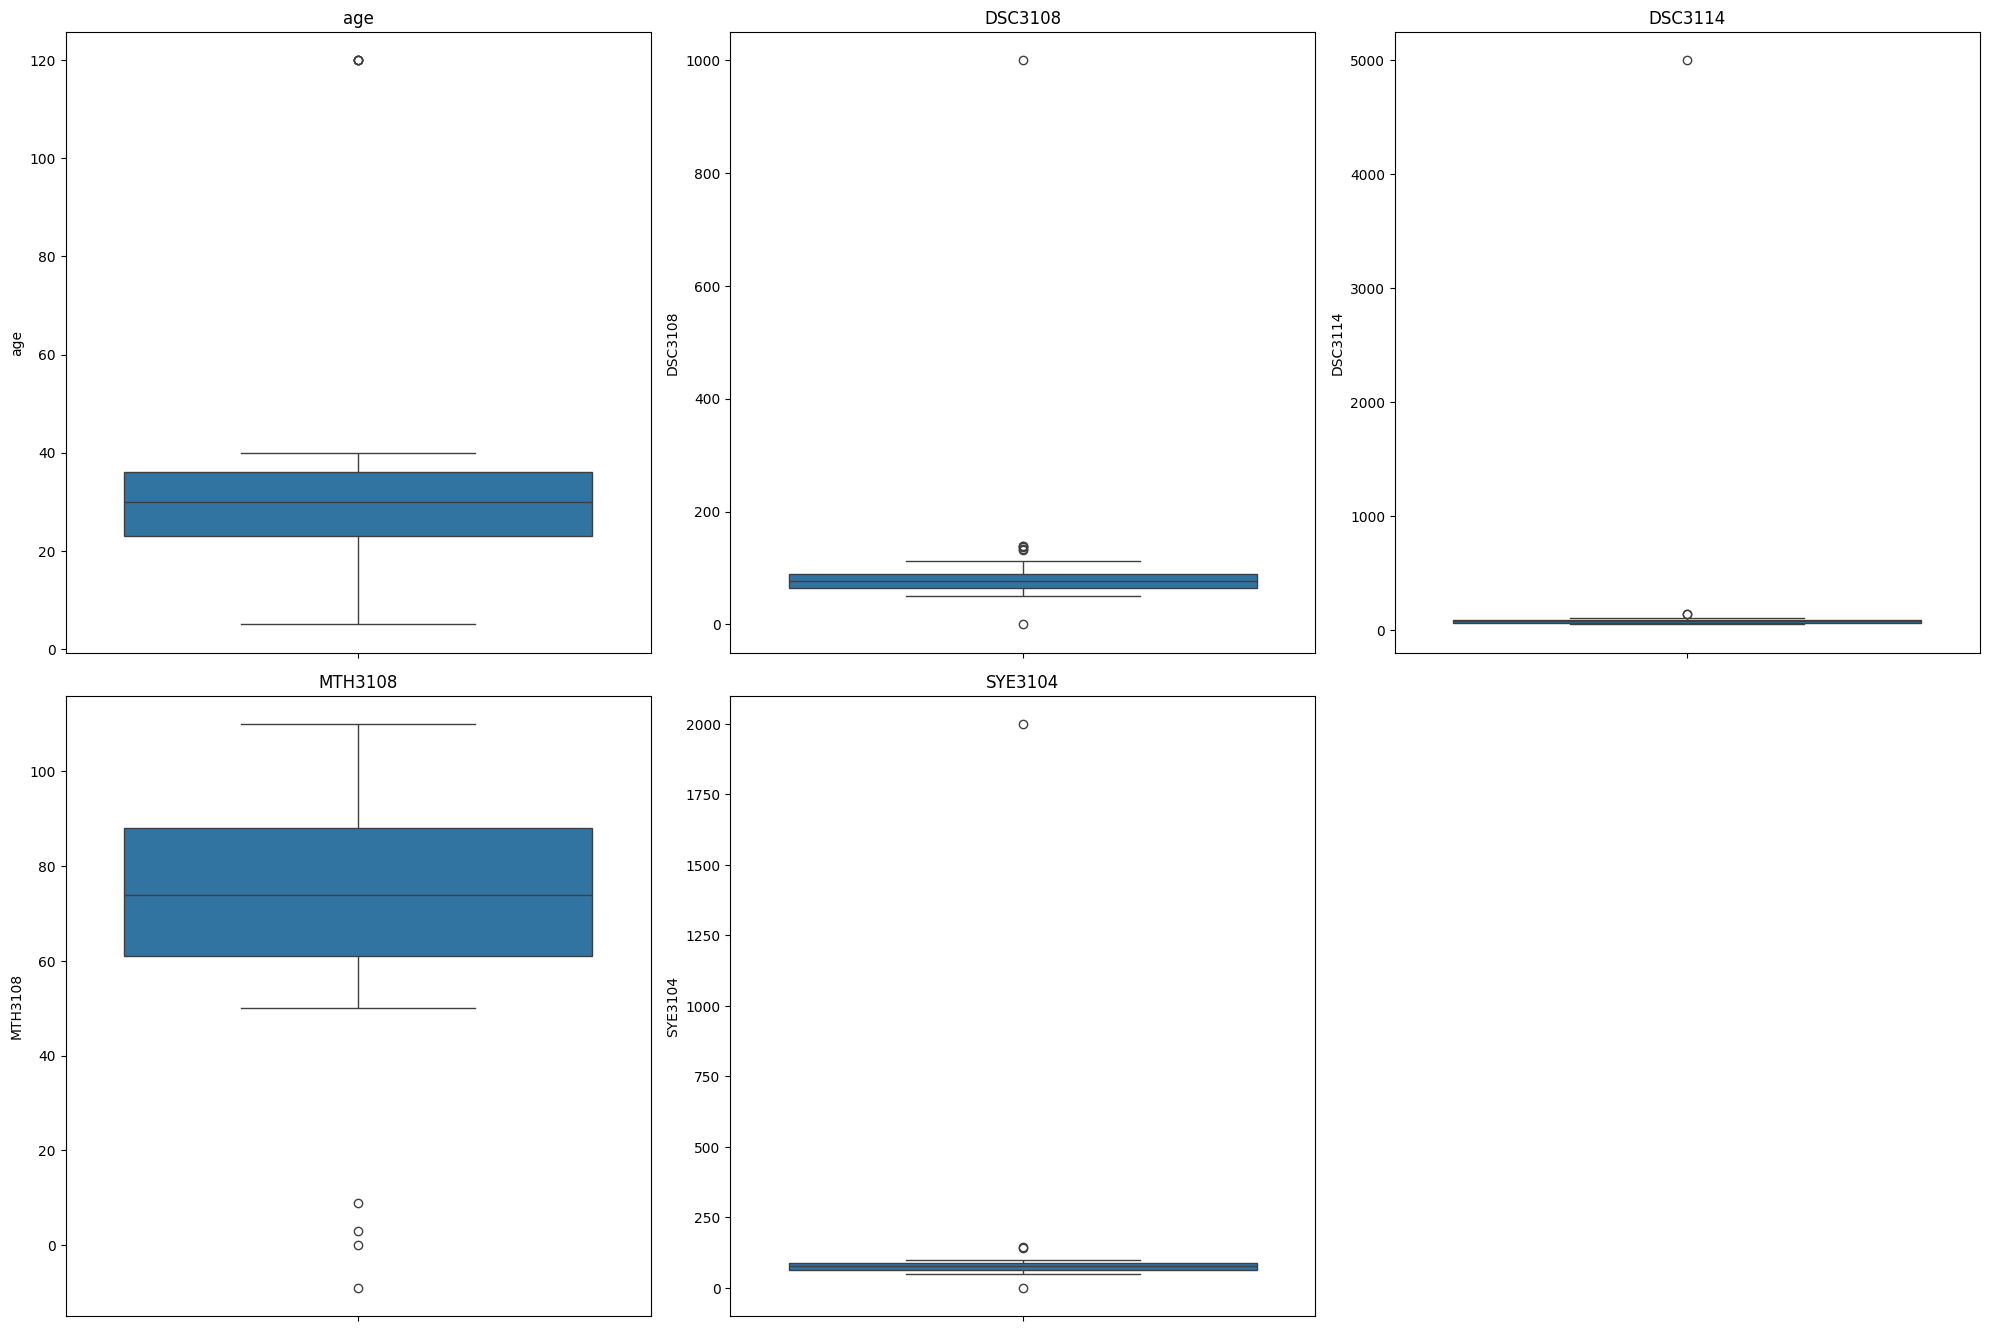

In [63]:
check_outliers(cont_df)

In [ ]:
def remove_outliers(data):
    for col in data.columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        #Finding IQR
        iqr = q3 - q1
        #Finding lower and upper boundsdata[col] = np.where((data[col] >= lower_bound) & (data[col] <= upper_bound), data[col], np.nan)
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        #Removing outliers
        data[col] = np.where(data[col] >= lower_bound | data[col] <= upper_bound, data[col])

In [70]:
remove_outliers(cont_df)

TypeError: Cannot perform 'ror_' with a dtyped [float64] array and scalar of type [bool]